In [473]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# parametry wheel-base i length

Zadanie 1

In [474]:
# def distp(X, C, e=None):
#     d_e = np.sqrt((X - C) * (X - C).T)
#     # d_e = np.sqrt(np.sum((X - C) * (X - C).T))
#     return d_e

def distp(X, C, e=None):
    d_e = np.sqrt(np.sum((X - C) ** 2, axis=1))
    return d_e

def dist(X, C):
    return np.sqrt(np.add.outer(np.sum(X * X, axis=1), np.sum(C * C, axis=1)) - 2 * X.dot(C.T))

In [475]:
def distm(X, C, V):
    d_m = np.sqrt(np.sum(np.dot((X - C), V) * (X - C), axis=1))

    return d_m

In [476]:
# from scipy.spatial.distance import cdist 

# def ksrodki(X, k, dist_type="euclidean"):
#     n = X.shape[0]
#     m = X.shape[1]
#     K = k

#     P = np.zeros((n, K))
#     C = np.random.rand(K, m)

#     # C = X[np.random.choice(n, k, replace=False), :] # być moze do usuniecia

#     # d = np.empty((1, 1))
#     # if dist_type == "euclidean":
#     #     d = distp(X, C)
#     # elif dist_type == "mahalanobis":
#     #     V = np.cov(X)
#     #     d = distm(X, C, V)

#     _P = _C = np.empty((1, 1))

#     while True:

#         _P = P.copy()
#         _C = C.copy()

#         for i in range(n):
#             for k in range(K):
#                 d = distp(X[i, :], C[k, :])
#                 P[i, k] = 1
#                 for l in range(K):
#                     if l != k and d >= distp(X[i, :], C[l, :]):
#                         P[i, k] = 0

#         # Ck = np.empty((k))
#         for k in range(K):
#             l = m = 0
#             for i in range(n):
#                 l += P[i, k] * X[i, :]
#                 m += P[i, k]

#             C[k, :] = l / m
            
#         print(P)
#         if np.array_equal(P, _P):
#             break
#     # return C, CX
#     return P, C


# def ksrodki(X, k):
#     m = X.shape[0]
#     n = X.shape[1]
#     K = k

#     P = np.zeros((n, K))
#     C = X[np.random.choice(k, n, replace=False), :]
#     S = np.empty((m))

#     _C = np.zeros(C.shape)

#     while not np.array_equal(C, _C):
#         _C = np.copy(C)
#         for j in range(K):
#             d = dist(X, C)
#             s = np.argmin(d, axis=1)
#             for x in range(X):
#                 if s == j:
#                     C[j, :] = np.mean()
#             print(s.shape)
#             print()


    # return P, C
# https://www.askpython.com/python/examples/k-means-clustering-from-scratch
# from scipy.spatial.distance import cdist 
# def kmeans(x,k, no_of_iterations):
#     idx = np.random.choice(len(x), k, replace=False)
#     #Randomly choosing Centroids 
#     centroids = x[idx, :] #Step 1
     
#     #finding the distance between centroids and all the data points
#     distances = cdist(x, centroids ,'euclidean') #Step 2
#     #Centroid with the minimum Distance
#     points = np.array([np.argmin(i) for i in distances]) #Step 3
     
#     #Repeating the above steps for a defined number of iterations
#     #Step 4
#     for _ in range(no_of_iterations): 
#         centroids = []
#         for idx in range(k):
#             #Updating Centroids by taking mean of Cluster it belongs to
#             temp_cent = x[points==idx].mean(axis=0) 
#             centroids.append(temp_cent)
 
#         centroids = np.vstack(centroids) #Updated Centroids 
         
#         distances = cdist(x, centroids ,'euclidean')
#         points = np.array([np.argmin(i) for i in distances])
         
#     return points 

In [477]:
import numpy as np

def kmeans(X, k, max_iters=100):
    """
    KMeans clustering algorithm using only NumPy library.

    Parameters:
    -----------
    X: numpy array
        Input data matrix of shape (n_samples, n_features).
    k: int
        Number of clusters.
    max_iters: int (default=100)
        Maximum number of iterations for convergence.

    Returns:
    --------
    centroids: numpy array
        Final centroid positions of shape (k, n_features).
    labels: numpy array
        Cluster labels for each data point of shape (n_samples,).
    """

    # Initialize centroids randomly
    rand_idx = np.random.choice(X.shape[0], size=k, replace=False)
    centroids = X[rand_idx]

    # Initialize labels
    labels = np.zeros(X.shape[0])

    for i in range(max_iters):

        # Calculate distances between each point and each centroid
        distances = np.sqrt(((X - centroids[:, np.newaxis])**2).sum(axis=2))

        # Assign each point to the closest centroid
        labels = np.argmin(distances, axis=0)

        # Update centroid positions
        for j in range(k):
            if np.sum(labels == j) == 0:
                # Empty cluster, reinitialize centroid to random point
                centroids[j] = X[np.random.choice(X.shape[0])]
            else:
                centroids[j] = np.mean(X[labels == j], axis=0)

    return centroids, labels


In [478]:
def kmeans(X, k, distance_metric='euclidean'):

    assert distance_metric in ['euclidean', 'mahalanobis'], "Zły typ odległości"
    assert isinstance(k, int) and k >= 1, "Podano złe k"
    assert isinstance(X, np.ndarray)
    
    n, m = X.shape
    K = k
    # Initialize centroids randomly
    centroids = X[np.random.choice(a=n, size=K, replace=False)]
    _centroids_old = np.empty((1))
    # Initialize labels
    labels = np.zeros(n)


    V = 0
    if distance_metric == 'mahalanobis':
        V = np.cov(X.T)

    while not np.array_equal(centroids, _centroids_old):
        
        _centroids_old = centroids.copy()

        distances = np.zeros((k, X.shape[0]))
        for j in range(K):
            if distance_metric == 'euclidean':
                distances[j] = distp(X, centroids[j, :])
            elif distance_metric == 'mahalanobis':
                distances[j] = distm(X, centroids[j, :], np.cov(V))
                

        # Assign each point to the closest centroid
        labels = np.argmin(distances, axis=0)

        # Update centroid positions
        for j in range(k):
            if np.sum(labels == j) == 0:
                # Empty cluster, reinitialize centroid to random point
                centroids[j] = X[np.random.choice(X.shape[0])]
            else:
                centroids[j] = np.mean(X[labels == j], axis=0)

    return centroids, labels

Zadanie 2

In [479]:
X = pd.read_csv("autos.csv")[['wheel-base', 'length']].to_numpy()

# plt.scatter(X[:, 0], X[:, 1]);
# https://pub.towardsai.net/k-means-clustering-from-scratch-4e357ac4716f

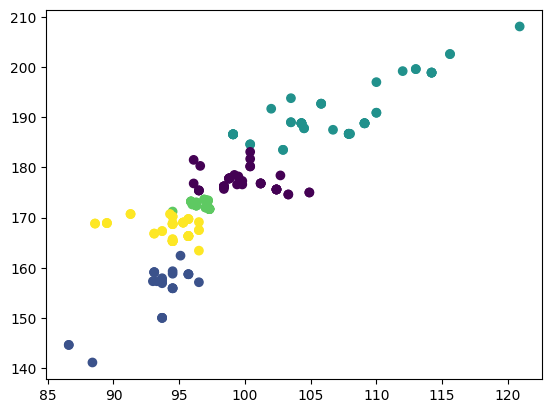

In [480]:
# from sklearn.cluster import KMeans
# P, C = ksrodki(X, 5)
# C
# P[:50, :]
# plt.scatter(X[:, 0], X[:, 1], c=C);
# C

# kmeans_model = KMeans(n_clusters = 5)
# kmeans_model.fit(X)
# plt.scatter(X[:, 0], X[:, 1], c=kmeans_model.labels_);
# kmeans_model.labels_


# labels = ksrodki(X, 5, 100)
# plt.scatter(X[:, 0], X[:, 1], c=labels);

c, l = kmeans(X, 5, 'mahalanobis')

plt.scatter(X[:, 0], X[:, 1], c=l);